# Data Preparation Week 5 and 6
## Joshua Greenert
## DSC540-T301 Data Preparation
## 10/3/2022

## Part 1

In [3]:
# Data Wrangling with Python: Activity 7, page 207
# Create three dataframes from data sourced from this url from the tables.
# https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Get the content from the page
page = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)")
content = page.content

# Create the page parser
soup = BeautifulSoup(content, 'html.parser')

# Get the countries table.
countries_table = soup.find('table', class_='wikitable')

#print('Classes of each table:')
#for table in soup.find_all('table'):
#    print(table.get('class'))
    
# Define the country dataframe.
df_countries = pd.DataFrame(columns=['Country', 'Region', 'IMF_Estimate', 'IMF_Year', 
                                     'UN_Estimate', 'UN_Year', 'WB_Estimate', 'WB_Year'])
count = 0
# Collect the data and store them into the dataframe.
for row in countries_table.tbody.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')
    
    if(columns != []):
        
        # Skip rows where data is missing for any field.
        if(len(columns) != 8):
            continue
        else:
            country = columns[0].text.strip()
            unRegion = columns[1].text.strip()
            imf_estimate = columns[2].text.strip()
            imf_year = columns[3].text.strip()
            un_estimate = columns[4].text.strip()
            un_year = columns[5].text.strip()
            wb_estimate = columns[6].text.strip()
            wb_year = columns[7].text.strip()
            
            new_row = {'Country': country,  'Region': unRegion, 'IMF_Estimate': imf_estimate, 
                                                'IMF_Year': imf_year, 'UN_Estimate': un_estimate, 'UN_Year': un_year, 
                                                'WB_Estimate': wb_estimate, 'WB_Year': wb_year}
            df_countries.loc[len(df_countries.index)] = new_row

df_countries.head(5)

,Country,Region,IMF_Estimate,IMF_Year,UN_Estimate,UN_Year,WB_Estimate,WB_Year
0,World,—,"93,863,851",2021,"87,461,674",2020,"96,100,091",2021
1,United States,Americas,"25,346,805",2022,"20,893,746",2020,"22,996,100",2021
2,China,Asia,"19,911,593",[n 2]2022,"14,722,801",[n 3]2020,"17,734,063",2021
3,Japan,Asia,"4,912,147",2022,"5,057,759",2020,"4,937,422",2021
4,Germany,Europe,"4,256,540",2022,"3,846,414",2020,"4,223,116",2021


In [4]:
# Getting other tables from the sources on the page (tables leftover don't look very pretty)
# Get the content from the page
page = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita")
content = page.content

# Create the page parser
soup = BeautifulSoup(content, 'html.parser')

# Get the countries table.
countries_table = soup.find('table', class_='wikitable')

# Define the country dataframe.
df_countries = pd.DataFrame(columns=['Country', 'Region', 'IMF_Estimate', 'IMF_Year', 
                                     'UN_Estimate', 'UN_Year', 'WB_Estimate', 'WB_Year'])
count = 0
# Collect the data and store them into the dataframe.
for row in countries_table.tbody.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')
    
    if(columns != []):
        
        # Skip rows where data is missing for any field.
        if(len(columns) != 8):
            continue
        else:
            country = columns[0].text.strip()
            unRegion = columns[1].text.strip()
            imf_estimate = columns[2].text.strip()
            imf_year = columns[3].text.strip()
            un_estimate = columns[4].text.strip()
            un_year = columns[5].text.strip()
            wb_estimate = columns[6].text.strip()
            wb_year = columns[7].text.strip()
            
            new_row = {'Country': country,  'Region': unRegion, 'IMF_Estimate': imf_estimate, 
                                                'IMF_Year': imf_year, 'UN_Estimate': un_estimate, 'UN_Year': un_year, 
                                                'WB_Estimate': wb_estimate, 'WB_Year': wb_year}
            df_countries.loc[len(df_countries.index)] = new_row

df_countries.head(5)

,Country,Region,IMF_Estimate,IMF_Year,UN_Estimate,UN_Year,WB_Estimate,WB_Year
0,Luxembourg *,Europe,"135,046",2022,"117,182",2020,"135,683",2021
1,Ireland *,Europe,"101,509",2022,"86,251",2020,"99,152",2021
2,Switzerland *,Europe,"96,390",2022,"86,919",2020,"93,457",2021
3,Norway *,Europe,"99,481",2022,"66,871",2020,"89,282",2021
4,Qatar *,Asia,"84,514",2022,"50,815",2020,"61,276",2021


In [5]:
# Getting other tables from the sources on the page (tables leftover don't look very pretty)
page = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)")
content = page.content

# Create the page parser
soup = BeautifulSoup(content, 'html.parser')

# Get the countries table.
countries_table = soup.find('table', class_='wikitable')

# Define the country dataframe.
df_countries = pd.DataFrame(columns=['Country', 'Region', 'IMF_Estimate', 'IMF_Year', 
                                     'WB_Estimate', 'WB_Year', 'CIA_Estimate', 'CIA_Year'])
count = 0
# Collect the data and store them into the dataframe.
for row in countries_table.tbody.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')
    
    if(columns != []):
        
        # Skip rows where data is missing for any field.
        if(len(columns) != 8):
            continue
        else:
            country = columns[0].text.strip()
            unRegion = columns[1].text.strip()
            imf_estimate = columns[2].text.strip()
            imf_year = columns[3].text.strip()
            wb_estimate = columns[4].text.strip()
            wb_year = columns[5].text.strip()
            cia_estimate = columns[6].text.strip()
            cia_year = columns[7].text.strip()
            
            new_row = {'Country': country,  'Region': unRegion, 'IMF_Estimate': imf_estimate, 
                                                'IMF_Year': imf_year, 'WB_Estimate': wb_estimate, 'WB_Year': wb_year, 
                                                'CIA_Estimate': cia_estimate, 'CIA_Year': cia_year}
            df_countries.loc[len(df_countries.index)] = new_row

df_countries.head(5)

,Country,Region,IMF_Estimate,IMF_Year,WB_Estimate,WB_Year,CIA_Estimate,CIA_Year
0,China,Asia,"30,177,926",2022,"24,273,360",2020,"23,009,780",2020
1,United States,Americas,"25,346,805",2022,"20,936,600",2020,"19,846,720",2020
2,India,Asia,"11,745,260",2022,"9,907,028",2020,"8,443,360",2020
3,Japan,Asia,"6,110,075",2022,"5,328,033",2019,"5,224,850",2019
4,Germany,Europe,"5,269,963",2022,"4,469,546",2020,"4,238,800",2020


## Part 2

In [23]:
# Data Wrangling with Python: Activity 8, page 233
import numpy as np
import matplotlib.pyplot as plt

# Read the visit data file.
df_visit = pd.read_csv('visit_data.csv')

df_visit.head(5)

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [24]:
# Check for duplicates using duplicated method.
print(f"First Name? {any(df_visit.first_name.duplicated())}")
print(f"Last Name? {any(df_visit.last_name.duplicated())}")
print(f"Email? {any(df_visit.email.duplicated())}")
print(f"IP Address? {any(df_visit.ip_address.duplicated())}")

'''There are duplicates in the first and last name columns only.'''

First Name? True
Last Name? True
Email? False
IP Address? False


'There are duplicates in the first and last name columns only.'

In [25]:
# Check if any essential columns contain NaNs.
print("Count of NaNs:")
print(f"First Name: {df_visit['first_name'].isna().sum()}")
print(f"Last Name: {df_visit['last_name'].isna().sum()}")
print(f"Email: {df_visit['email'].isna().sum()}")
print(f"IP Address: {df_visit['ip_address'].isna().sum()}")
print(f"Visit: {df_visit['visit'].isna().sum()}")

Count of NaNs:
First Name: 296
Last Name: 296
Email: 0
IP Address: 0
Visit: 26


In [28]:
# Remove the outliers.  Need to figure out the size before dropping nans.
df_size_with_nans = df_visit.shape
df_visit = df_visit.dropna()

In [29]:
# Report the size difference.
print(f"The size of the dataframe before removing nans is {df_size_with_nans}")
print(f"The size of the dataframe now is {df_visit.shape}")

The size of the dataframe before removing nans is (1000, 7)
The size of the dataframe now is (337, 7)


{'whiskers': [<matplotlib.lines.Line2D at 0x23aec5518e0>,
 'caps': [<matplotlib.lines.Line2D at 0x23aec551f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x23aec551610>],
 'medians': [<matplotlib.lines.Line2D at 0x23aec569490>],
 'fliers': [<matplotlib.lines.Line2D at 0x23aec569760>],
 'means': []}

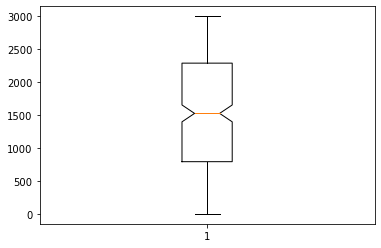

In [32]:
# Create a box plot to check for outliers.
plt.boxplot(df_visit.visit, notch=True)

In [34]:
# Get rid of the outliers.
df_visit_new = df_visit[(df_visit['visit'] <= 2900) & (df_visit['visit'] >= 100)]
df_visit_new.head(5)

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
6,7,Wilhelmina,Dagnan,wdagnan6@nytimes.com,Female,88.133.77.243,1540.0
9,10,Luelle,Scinelli,lscinelli9@issuu.com,Female,160.130.58.61,1507.0
12,13,Katya,Rewcassell,krewcassellc@dyndns.org,Female,68.203.78.150,661.0
17,18,Forrester,Randleson,frandlesonh@cnet.com,Male,133.200.143.251,303.0


## Part 3

In [39]:
# Insert data into a SQL Lite database – create a table with the following data
#   a. Name, Address, City, State, Zip, Phone Number
#   b. Add at least 10 rows of data and submit your code with a query generating your results.
import sqlite3

# Create the table using a query.
createTableQuery = """
CREATE TABLE usertable(name varchar(20), address varchar(50), city varchar(20), state varchar(2), zip integer(5), phone_number integer(10));
"""

# Create the connection
conn = sqlite3.connect('mydata.sqlite')
conn.execute(createTableQuery)
conn.commit()

OperationalError: table usertable already exists

In [40]:
# Insert the 10 rows of data into the database.
data = [('Ulla Hopkins', '9637 Placerat Rd', 'Schwalbach', 'NE', 53179, 2682710286),
        ('Myra Osborn','385-5226 Rutrum Road', 'Casanova Elvo', 'FL', 48854, 2682710286 ),
        ('Lester Holman', '339-4864 Et Rd', 'Kacchi', 'NE', 36165, 7808882816),
        ('Timothy Horne','Ap #826-5932 Quis St.', 'Rạch Gia', 'GA', 41254, 5722302276 ),
        ('Lana Mason', '313-8034 Ultricies Rd.', 'Lutsk', 'IN', 50409, 5284884723),
        ('Jolie Day', '1230 Vivamus Rd', 'Bautzen', 'MI', 16861, 5701000601 ),
        ('Bree Acosta', 'P.O. Box 994, 831 Ac Rd', 'Naushahro', 'RI', 98741, 7351396348),
        ('Fatima Reese', 'Ap #741-4347 Vivamus St', 'Warminster', 'FL', 14934, 3667546251 ),
        ('Aphrodite Norman', '973-431 Tincidunt Avenue', 'Calle Blancos', 'AL', 86086, 5464585376),
        ('Ian Reilly', 'P.O. Box 621, 9470 Enim St', 'Middelburg', 'IL', 45325, 2852418273)]

statement = "Insert into usertable VALUES(?, ?, ?, ?, ?, ?)"
conn.executemany(statement, data)

conn.commit()

In [41]:
# Display the results.
cursor = conn.execute("Select * from usertable")

rows = cursor.fetchall()
rows

[('Ulla Hopkins', '9637 Placerat Rd', 'Schwalbach', 'NE', 53179, 2682710286),
 ('Myra Osborn',
  '385-5226 Rutrum Road',
  'Casanova Elvo',
  'FL',
  48854,
  2682710286),
 ('Lester Holman', '339-4864 Et Rd', 'Kacchi', 'NE', 36165, 7808882816),
 ('Timothy Horne',
  'Ap #826-5932 Quis St.',
  'Rạch Gia',
  'GA',
  41254,
  5722302276),
 ('Lana Mason', '313-8034 Ultricies Rd.', 'Lutsk', 'IN', 50409, 5284884723),
 ('Jolie Day', '1230 Vivamus Rd', 'Bautzen', 'MI', 16861, 5701000601),
 ('Bree Acosta',
  'P.O. Box 994, 831 Ac Rd',
  'Naushahro',
  'RI',
  98741,
  7351396348),
 ('Fatima Reese',
  'Ap #741-4347 Vivamus St',
  'Warminster',
  'FL',
  14934,
  3667546251),
 ('Aphrodite Norman',
  '973-431 Tincidunt Avenue',
  'Calle Blancos',
  'AL',
  86086,
  5464585376),
 ('Ian Reilly',
  'P.O. Box 621, 9470 Enim St',
  'Middelburg',
  'IL',
  45325,
  2852418273)]